# Timesfm Usage Example

## Loading Timesfm Model

In [1]:
import numpy as np

from samay.model import TimesfmModel
from samay.dataset import TimesfmDataset

from samay.model import TimesfmModel
from samay.dataset import TimesfmDataset
from samay.utils import load_args

repo = "google/timesfm-1.0-200m-pytorch"
config = {
    "context_len": 512,
    "horizon_len": 192,
    "backend": "gpu",
    "per_core_batch_size": 32,
    "input_patch_len": 32,
    "output_patch_len": 128,
    "num_layers": 20,
    "model_dims": 1280,
    "quantiles": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
}

tfm = TimesfmModel(config=config, repo=repo)

Using device: cuda:3


Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

INFO:p-1987940:t-140070280951616:timesfm_torch.py:load_from_checkpoint:Loading checkpoint from /nethome/sanand315/.cache/huggingface/hub/models--google--timesfm-1.0-200m-pytorch/snapshots/0581e2c56cb06feb51cfd98fc2b4005b74f7187b/torch_model.ckpt
INFO:p-1987940:t-140070280951616:timesfm_torch.py:load_from_checkpoint:Sending checkpoint to device cuda:3


## Define the datasets

In [2]:
train_dataset = TimesfmDataset(name="ett", datetime_col='date', path='../data/data/ETTh1.csv', normalize=False,
                              mode='train', context_len=512, horizon_len=192)
val_dataset = TimesfmDataset(name="ett", datetime_col='date', path='../data/data/ETTh1.csv', normalize=False, 
                              mode='test', context_len=512, horizon_len=192)

INFO:p-1987940:t-140070280951616:data_loader.py:__init__:Data Shapes: (7, 17419), (7, 17613), (1, 17420), (1, 17420)
INFO:p-1987940:t-140070280951616:data_loader.py:train_gen:Hist len: 512
INFO:p-1987940:t-140070280951616:data_loader.py:__init__:Data Shapes: (7, 17419), (7, 17613), (1, 17420), (1, 17420)
INFO:p-1987940:t-140070280951616:data_loader.py:test_val_gen:Hist len: 512


In [3]:
len(train_dataset.dataset), len(val_dataset.dataset)

(801, 27)

## Evaluate the zero-shot forecasting

In [4]:
metrics = tfm.evaluate(val_dataset)
print(metrics)

{'mse': 17.941584, 'mae': 2.2708952, 'mase': 2.3713315, 'mape': 1283.0352, 'rmse': 4.2357507, 'nrmse': 0.09224394849614606, 'smape': 0.52310854, 'msis': 0.07495748, 'nd': 0.6029509394239408, 'mwsq': 2.1457655, 'crps': 80.7888972655018}


## Visualization of the evaluation
The following code visualises the forecast for a randomly picked `channel` and a randomly picked `time_index`

(27, 7, 512)


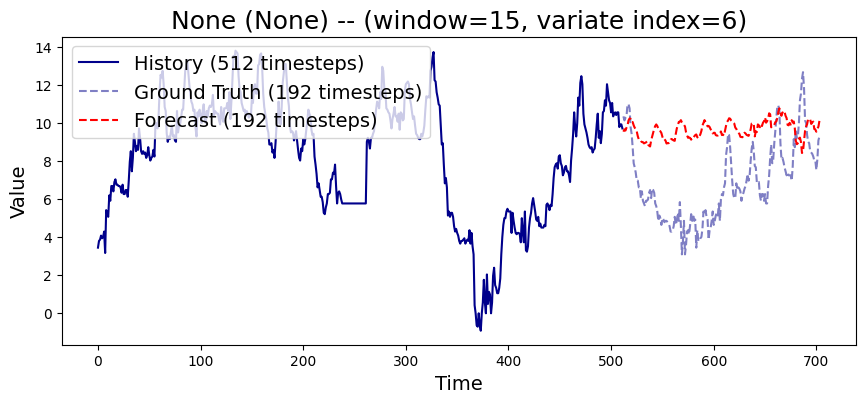

In [5]:
tfm.plot(val_dataset)

## Finetune Timesfm Model on the ETT dataset

In [6]:
finetuned_model = tfm.finetune(train_dataset)

Epoch 0, Loss: 18.218768575298252
Epoch 1, Loss: 15.668467429040614
Epoch 2, Loss: 14.725927371423039
Epoch 3, Loss: 14.109928899828676
Epoch 4, Loss: 13.588568268989764


## Test the Finetuned Model

In [7]:
metrics = tfm.evaluate(val_dataset)
print(metrics)

{'mse': 11.378438, 'mae': 1.8082021, 'mase': 1.8881745, 'mape': 1426.8136, 'rmse': 3.373194, 'nrmse': 0.07345964282373121, 'smape': 0.43626714, 'msis': 0.066270255, 'nd': 0.4801001662242205, 'mwsq': 1.1346214, 'crps': 55.627149576217285}


(27, 7, 512)


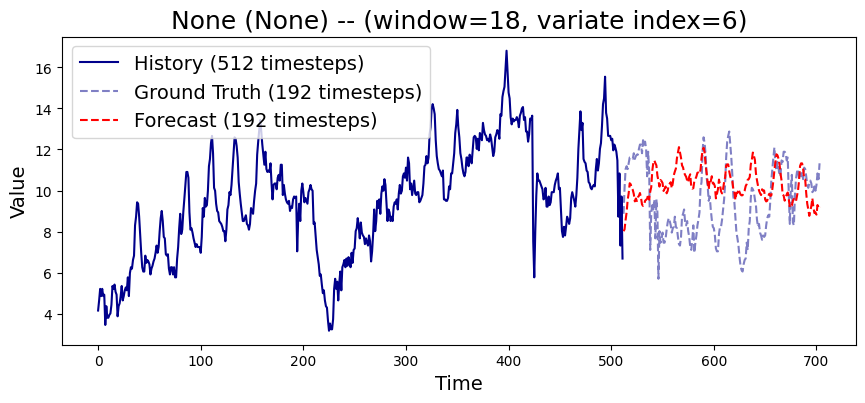

In [8]:
tfm.plot(val_dataset)